In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exercise 1: 
## a) Compute the correlation between mean salary and year.
## b) Generate a graph of mean salary per year.

In [2]:
df_s=pd.read_csv('salary.csv')
df_s.head()

,year,team_id,league_id,player_id,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [3]:
df_s.shape

(25575, 5)

In [4]:
df_s_yr=df_s[['year', 'salary']].groupby('year').mean()
df_s_yr=df_s_yr.reset_index()
df_s_yr.head()

,year,salary
0,1985,476299
1,1986,417147
2,1987,434729
3,1988,453171
4,1989,506323


In [5]:
#a. Compute the correlation between mean salary and year.
df_s_yr.corr()
#the coefficient is large, the relation is strong between year and salary

,year,salary
year,1.000000,0.983687
salary,0.983687,1.000000


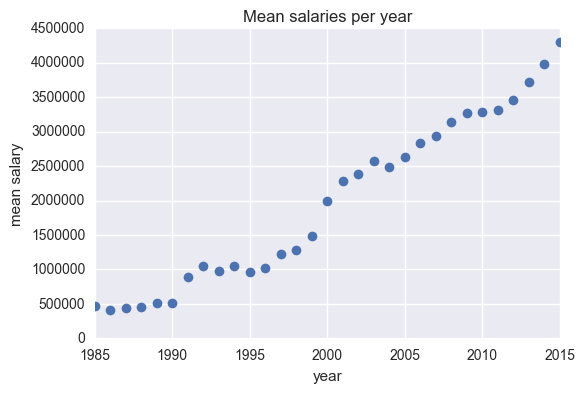

In [6]:
#b.  Generate a graph of mean salary per year.
plt.plot(df_s_yr['year'], df_s_yr['salary'], 'o')
plt.xlabel('year')
plt.ylabel('mean salary')
plt.title('Mean salaries per year')

# Exercise 2: 
## a) Find the best line that approximates mean salary with respect to years. 
## b) Plot this line together with the data from exercise 1.

In [7]:
#Find the best line that approximates mean salary with respect to years.
import statsmodels.api as sm
model=sm.OLS.from_formula('salary~year', df_s_yr)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     867.2
Date:                Wed, 12 Jul 2017   Prob (F-statistic):           3.70e-23
Time:                        22:00:21   Log-Likelihood:                -424.86
No. Observations:                  31   AIC:                             853.7
Df Residuals:                      29   BIC:                             856.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -2.63e+08      9e+06    -29.228      0.000     -2.81e+08 -2.45e+08
year        1.325e+05   4499.196     29.448      0.000      1.23e+05  1.42e+05
==============================================================================
Omnibus:                        0.781   Durbin-Watson:                   0.395
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.511
Skew:                          -0.310   Prob(JB):                        0.774
Kurtosis:                       2.890   Cond. No.                     4.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
print(" The equation is: {:.3f} + year * {:.3f}." .format( result.params[0], result.params[1]))

 The equation is: -263004611.968 + year * 132492.016.


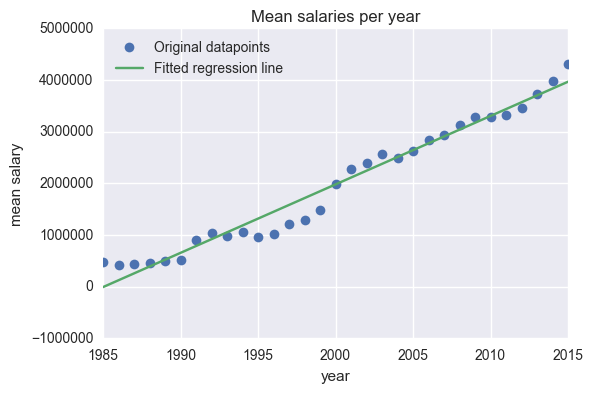

In [9]:
# b. Plot this line together with the data from exercise 1.
plt.plot(df_s_yr['year'], df_s_yr['salary'], 'o', label='Original datapoints')
plt.plot(df_s_yr['year'], result.fittedvalues, label='Fitted regression line')
plt.xlabel('year')
plt.ylabel('mean salary')
plt.legend(loc='upper left')
plt.title('Mean salaries per year')

# Exercise 3: Create a box plot for salaries per year.

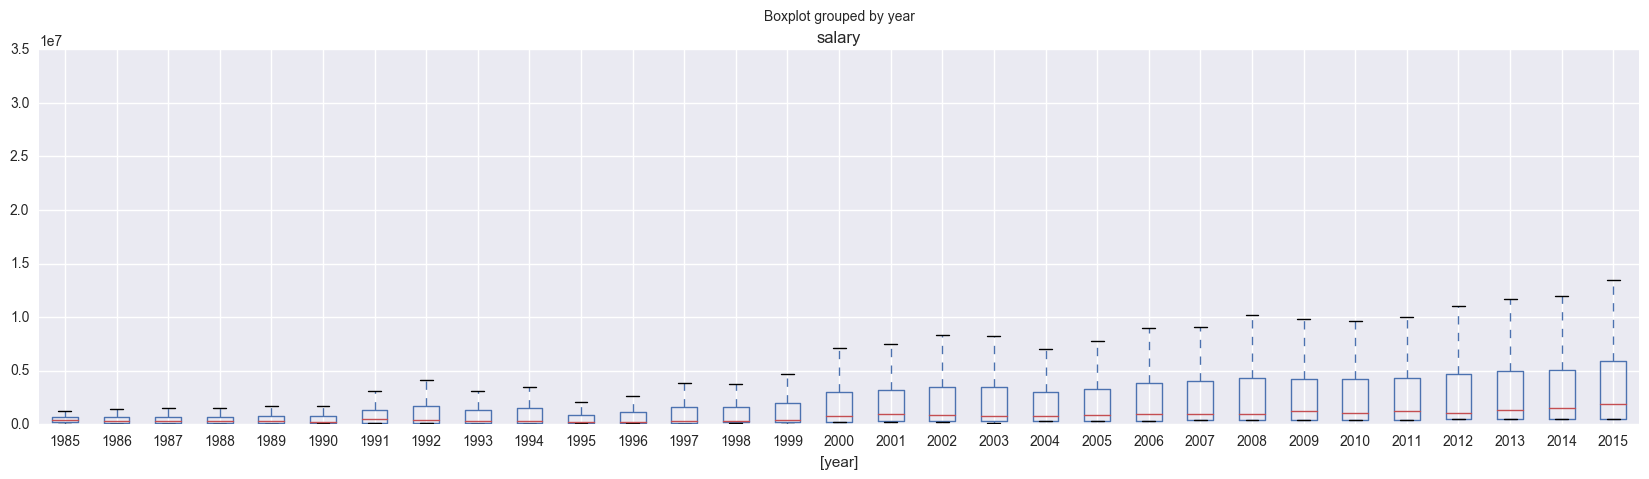

In [10]:
#for yr in df_s_yr['year']:
    #df_s[df_f['year']=yr].boxplot()
fig, ax=plt.subplots(figsize=(20,5))
fig=df_s[['year','salary']].boxplot(by='year', ax=ax)

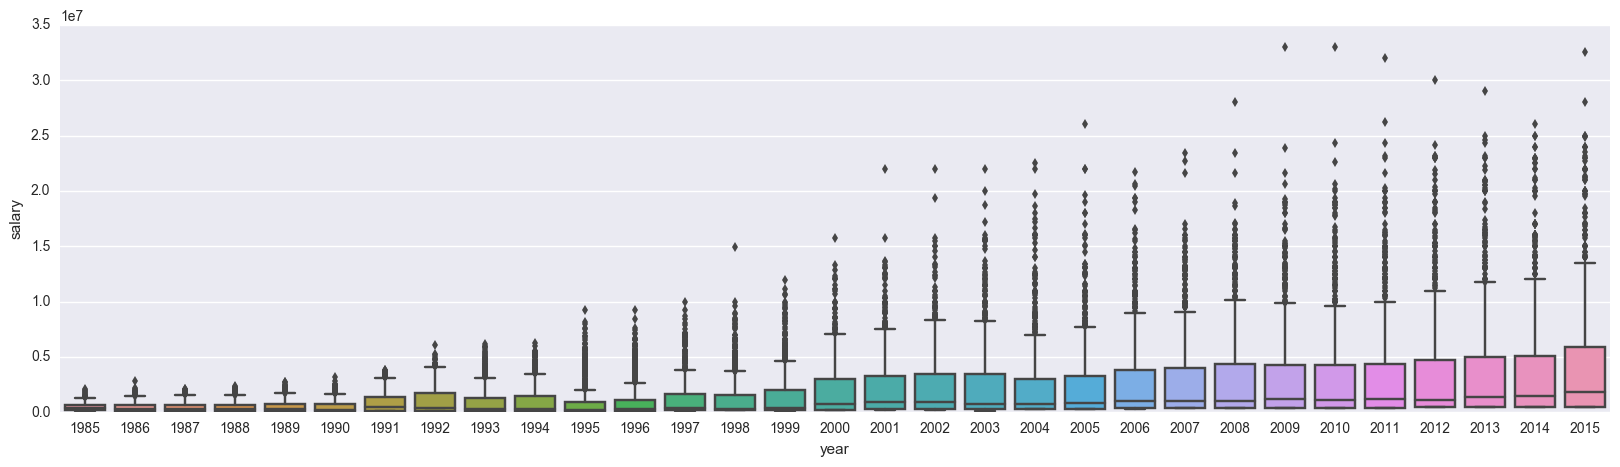

In [11]:
fig, ax=plt.subplots(figsize=(20,5))
ax = sns.boxplot(x="year", y="salary", data=df_s)

# Exercise 4: From the previous graph we can see an increasing disparity in salaries as time increases. 
## a) How would you measure disparity in salaries? 
## b) Compute the correlation of disparity and years.
## c) Find the best line that approximates disparity with respect to years.

In [12]:
# I would use the variance or standard_deviation  for the disparities
df_s_std=df_s.groupby('year')['salary'].std()
df_s_std=df_s_std.reset_index()
df_s_std=df_s_std.rename( columns={'salary': 'std_salary'})
df_s_std.head()

,year,std_salary
0,1985,343320.889497
1,1986,394017.573716
2,1987,431182.170169
3,1988,453158.099159
4,1989,538045.431737


In [13]:
df_s_std.corr()
#correlation is high as well

,year,std_salary
year,1.000000,0.992156
std_salary,0.992156,1.000000


In [14]:
model_std=sm.OLS.from_formula('std_salary~year', df_s_std)
result_std=model_std.fit()
result_std.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             std_salary   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1827.
Date:                Wed, 12 Jul 2017   Prob (F-statistic):           9.57e-28
Time:                        22:00:23   Log-Likelihood:                -423.17
No. Observations:                  31   AIC:                             850.3
Df Residuals:                      29   BIC:                             853.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -3.616e+08   8.52e+06    -42.436      0.000     -3.79e+08 -3.44e+08
year        1.821e+05   4260.135     42.742      0.000      1.73e+05  1.91e+05
==============================================================================
Omnibus:                        0.111   Durbin-Watson:                   0.397
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.044
Skew:                          -0.057   Prob(JB):                        0.978
Kurtosis:                       2.855   Cond. No.                     4.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

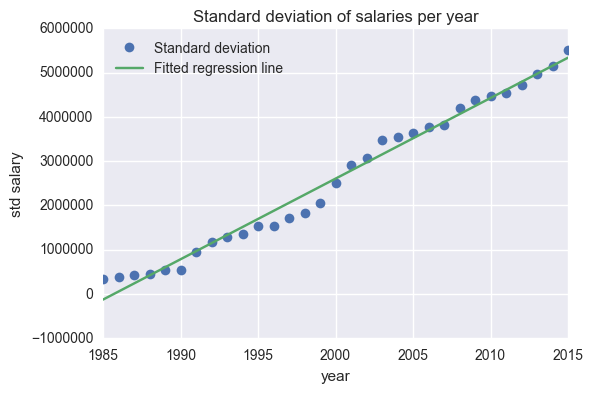

In [15]:
# b. Plot this line 
plt.plot(df_s_std['year'], df_s_std['std_salary'], 'o', label='Standard deviation')
plt.plot(df_s_std['year'], result_std.fittedvalues, label='Fitted regression line')
plt.xlabel('year')
plt.ylabel('std salary')
plt.legend(loc='upper left')
plt.title('Standard deviation of salaries per year')

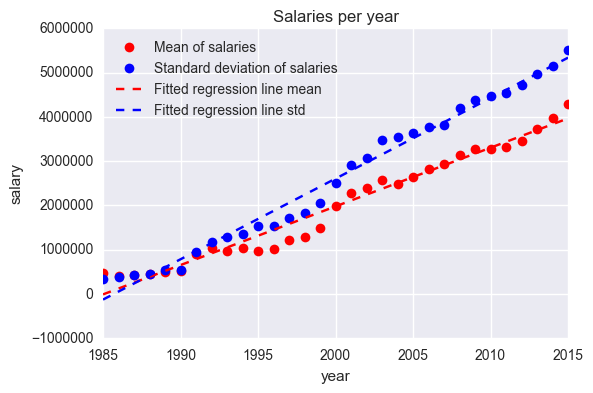

In [16]:
# b. Plot every datapoints 
plt.plot(df_s_yr['year'], df_s_yr['salary'], 'ro', label='Mean of salaries')
plt.plot(df_s_std['year'], df_s_std['std_salary'], 'bo', label='Standard deviation of salaries')
plt.plot(df_s_yr['year'], result.fittedvalues, 'r--',label='Fitted regression line mean')
plt.plot(df_s_std['year'], result_std.fittedvalues, 'b--', label='Fitted regression line std')
plt.xlabel('year')
plt.ylabel('salary')
plt.legend(loc='upper left')
plt.title('Salaries per year')
#The increase in disparities per year is bigger than the increase of the mean-salaries

# Exercise 5: 
## a) Build a predictive model for the amount of hits for a team given Games played, Wins, Walks by batters, At bats, Fielding  percentage, Outs Pitched (innings pitched x 3), Hits allowed, Earned runs allowed, Doubles. To solve this problem you will use team.csv. 

## b) How does your model measure accuracy?
## c) What was the score for its accuracy?
## d) Choose two features and create a 3d plot of feature1, feature2, h.

In [17]:
df_team_orig=pd.read_csv('team.csv')

df_team_orig.head()

,year,league_id,team_id,franchise_id,div_id,rank,g,ghome,w,l,...,dp,fp,name,park,attendance,bpf,ppf,team_id_br,team_id_lahman45,team_id_retro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [18]:
df_team_orig.columns

Index(['year', 'league_id', 'team_id', 'franchise_id', 'div_id', 'rank', 'g',
       'ghome', 'w', 'l', 'div_win', 'wc_win', 'lg_win', 'ws_win', 'r', 'ab',
       'h', 'double', 'triple', 'hr', 'bb', 'so', 'sb', 'cs', 'hbp', 'sf',
       'ra', 'er', 'era', 'cg', 'sho', 'sv', 'ipouts', 'ha', 'hra', 'bba',
       'soa', 'e', 'dp', 'fp', 'name', 'park', 'attendance', 'bpf', 'ppf',
       'team_id_br', 'team_id_lahman45', 'team_id_retro'],
      dtype='object')

In [19]:
df_team=df_team_orig.rename(columns={'h': 'Hits_by_batters', 'g':'Games_played', 'w': 'Wins', 'bb':'Walks_by_batters', 'ab':'At_bats', 'fp':'Fielding_percentage', 'ipouts':'Outs_Pitched','ha':'Hits_allowed', 'er':'Earned_runs_allowed','dp':'Double'})

df_team=df_team[['Hits_by_batters','Games_played', 'Wins', 'Walks_by_batters', 'At_bats', 'Fielding_percentage', 'Outs_Pitched','Hits_allowed','Earned_runs_allowed','Double']]
df_team.head()

,Hits_by_batters,Games_played,Wins,Walks_by_batters,At_bats,Fielding_percentage,Outs_Pitched,Hits_allowed,Earned_runs_allowed,Double
0,426,31,20,60,1372,0.83,828,367,109,NaN
1,323,28,19,60,1196,0.82,753,308,77,NaN
2,328,29,10,26,1186,0.81,762,346,116,NaN
3,178,19,7,33,746,0.80,507,261,97,NaN
4,403,33,16,33,1404,0.83,879,373,121,NaN


In [20]:
#import statsmodels.api as sm
model=sm.OLS.from_formula('Hits_by_batters~' + '+'.join(df_team.columns.difference(['Hits_by_batters'])), df_team)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Hits_by_batters   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     3856.
Date:                Wed, 12 Jul 2017   Prob (F-statistic):               0.00
Time:                        22:00:24   Log-Likelihood:                -12840.
No. Observations:                2488   AIC:                         2.570e+04
Df Residuals:                    2478   BIC:                         2.576e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept            -214.7168     87.547     -2.453      0.014      -386.389   -43.044
At_bats                 0.5648      0.012     45.938      0.000         0.541     0.589
Double                 -0.2351      0.044     -5.319      0.000        -0.322    -0.148
Earned_runs_allowed    -0.1082      0.021     -5.146      0.000        -0.149    -0.067
Fielding_percentage   113.3313     98.881      1.146      0.252       -80.567   307.229
Games_played           -0.7240      0.582     -1.244      0.214        -1.866     0.418
Hits_allowed            0.4175      0.015     28.020      0.000         0.388     0.447
Outs_Pitched           -0.5244      0.024    -21.682      0.000        -0.572    -0.477
Walks_by_batters        0.0005      0.013      0.040      0.968        -0.026     0.027
Wins                    4.0555      0.110     36.778      0.000         3.839     4.272
==============================================================================
Omnibus:                       28.851   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.229
Skew:                           0.241   Prob(JB):                     2.73e-07
Kurtosis:                       3.243   Cond. No.                     1.08e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
print("The accuracy is {:.3f}, that shows a strong relationship." .format(result.rsquared))

The accuracy is 0.933, that shows a strong relationship.


In [22]:
#When I apply the sklearn method ,like in the Solution, I still dont get the same R2 -> 
#I have missing values which I had to drop -> how is with missings in the solution? It isn't mentioned
df_team_=df_team.dropna()
print(df_team_.shape, df_team.shape)

x=df_team_.drop('Hits_by_batters', axis=1)
y=df_team_['Hits_by_batters']
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


lr.fit(x,y)
lr.score(x,y)

(2488, 10) (2805, 10)


0.93335658688702061

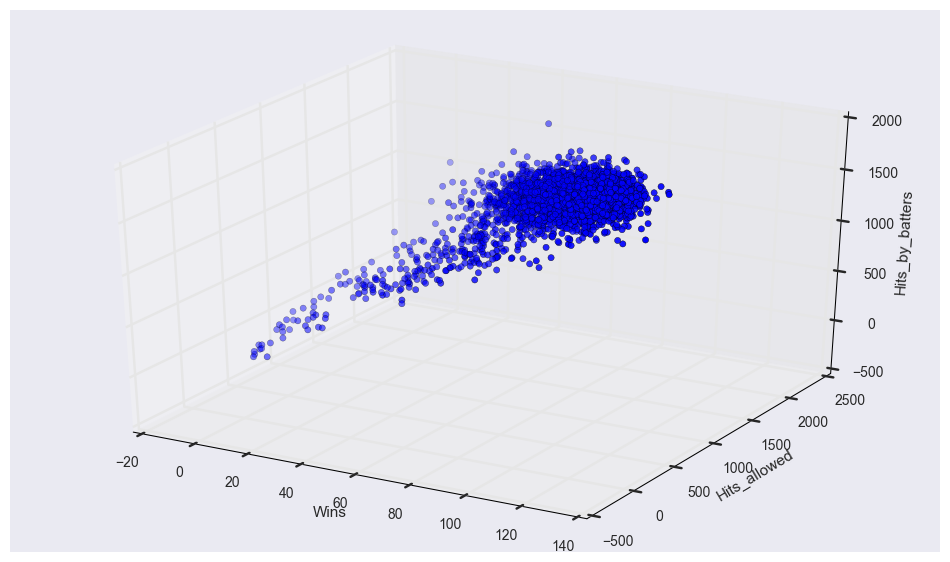

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(12,7))
ax=fig.add_subplot(111, projection='3d')
x=df_team['Wins']
y=df_team['Hits_allowed']
z=df_team['Hits_by_batters']
ax.scatter(x,y,z)
ax.set_xlabel('Wins')
ax.set_ylabel('Hits_allowed')
ax.set_zlabel('Hits_by_batters')

# Exercise 6: Build a similar model to predict average hits per year based on Games played, At bats and whether a player is a left or right handed batter. Consider only those players who are either left or right handed batters and for the moment do not worry about missing data or ambidextrous batters. 

In [24]:
df_player=pd.read_csv('player.csv')
df_batting=pd.read_csv('batting.csv')
print(df_player.columns)
print(df_batting.columns)
#Batting Table

Index(['player_id', 'birth_year', 'birth_month', 'birth_day', 'birth_country',
       'birth_state', 'birth_city', 'death_year', 'death_month', 'death_day',
       'death_country', 'death_state', 'death_city', 'name_first', 'name_last',
       'name_given', 'weight', 'height', 'bats', 'throws', 'debut',
       'final_game', 'retro_id', 'bbref_id'],
      dtype='object')
Index(['player_id', 'year', 'stint', 'team_id', 'league_id', 'g', 'ab', 'r',
       'h', 'double', 'triple', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb',
       'hbp', 'sh', 'sf', 'g_idp'],
      dtype='object')


In [25]:
#bats : left or right
#df_batting.head()
df_player['bats'].value_counts()

R    11615
L     4877
B     1163
Name: bats, dtype: int64

In [26]:
df_batting=df_batting.rename(columns={ 'g': 'Games', 'ab': 'At_Bats', 'h': 'Hits'})
df_batting=df_batting[['year', 'Games','At_Bats', 'Hits', 'player_id']]

df_player=df_player[['player_id','bats']]

In [27]:
#player can have different values in one year
df_batting.groupby(['year', 'player_id'])['Games'].count().sort_values(ascending=False)[:10]

year  player_id
1904  huelsfr01    5
1915  wistete01    4
1940  hudliwi01    4
1884  striege01    4
1971  fernafr01    4
1951  lehnepa01    4
2007  kimby01      4
1972  kilkemi01    4
1892  kuehnbi01    4
      dowseto01    4
Name: Games, dtype: int64

In [28]:
#sum the columns per player per year
df_batting_aggr=df_batting.groupby(['year', 'player_id']).sum()
df_batting_aggr=df_batting_aggr.reset_index()

In [29]:
#average values per player
df_batting_aggr=df_batting_aggr.groupby('player_id').mean().reset_index()
df_batting_aggr=df_batting_aggr.drop('year', axis=1)
df_batting_aggr.head()

,player_id,Games,At_Bats,Hits
0,aardsda01,36.777778,0.444444,0.000000
1,aaronha01,143.391304,537.565217,163.956522
2,aaronto01,62.428571,134.857143,30.857143
3,aasedo01,34.461538,2.500000,0.000000
4,abadan01,5.000000,7.000000,0.666667


In [30]:
df=pd.merge(df_batting_aggr, df_player, how='inner', on='player_id')

In [31]:
#filter players - left or right handed batters
df_filt=df[(df['bats']=='L')| (df['bats']=='R')]

In [32]:
df_filt.head(5)

,player_id,Games,At_Bats,Hits,bats
0,aardsda01,36.777778,0.444444,0.000000,R
1,aaronha01,143.391304,537.565217,163.956522,R
2,aaronto01,62.428571,134.857143,30.857143,R
3,aasedo01,34.461538,2.500000,0.000000,R
4,abadan01,5.000000,7.000000,0.666667,L


In [33]:

#df_filt['Right_Bat']=df_filt['bats'].apply(lambda x: 1 if x=='R' else 0, 1)
df_filt['Right_Bat']=[1 if x=='R' else 0 for x in df_filt['bats']]
df_filt.head()

/Users/adribadri/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,player_id,Games,At_Bats,Hits,bats,Right_Bat
0,aardsda01,36.777778,0.444444,0.000000,R,1
1,aaronha01,143.391304,537.565217,163.956522,R,1
2,aaronto01,62.428571,134.857143,30.857143,R,1
3,aasedo01,34.461538,2.500000,0.000000,R,1
4,abadan01,5.000000,7.000000,0.666667,L,0


In [34]:
df_filt=df_filt.drop('bats',axis=1)

In [35]:
result=sm.OLS.from_formula('Hits ~ Games + At_Bats + Right_Bat', df_filt).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Hits   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 3.591e+05
Date:                Wed, 12 Jul 2017   Prob (F-statistic):               0.00
Time:                        22:00:27   Log-Likelihood:                -46248.
No. Observations:               16015   AIC:                         9.250e+04
Df Residuals:                   16011   BIC:                         9.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.6246      0.081     -7.693      0.000        -0.784    -0.465
Games         -0.0447      0.003    -14.827      0.000        -0.051    -0.039
At_Bats        0.2850      0.001    354.471      0.000         0.283     0.287
Right_Bat     -1.1401      0.075    -15.124      0.000        -1.288    -0.992
==============================================================================
Omnibus:                     3840.543   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70770.326
Skew:                           0.678   Prob(JB):                         0.00
Kurtosis:                      13.209   Cond. No.                         497.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
print("The accuracy of the model is {:.3f}." .format(result.rsquared))

The accuracy of the model is 0.985.
